# 온라인 서점 고객세분화 예시 -- 참고용

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rjitt5(arr):
    stdev = .07*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)


import warnings
warnings.filterwarnings('ignore')


# local data path
# dataPath = 'D:/YONG/myPydata/' # 데이터 위치는 사용자 지정
dataPath = 'C:/Users/kofot/fashionRetailAnalysisPy_4a-20230629T052521Z-001/fashionRetailAnalysisPy_4a/' # 생성위치는 사용자 지정


import matplotlib.font_manager

    
# matplotlib 에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록



dataPath = 'C:/Users/kofot/fashionRetailAnalysisPy_4a-20230629T052521Z-001/fashionRetailAnalysisPy_4a/' # 생성위치는 사용자 지정

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# loading sample data
cs1 = pd.read_csv('https://t1.daumcdn.net/cfile/blog/99021E425BDFF86929?download', encoding='CP949')
# 유니코드 디코드 에러, UnicodeDecodeError: 'utf-8' codec can't decode byte
# 에러 발생을 피하기 위해encoding 옵션 지정
print(cs1.columns)
cs1.head()

Index(['고객명', '성별', '연령', '지역', '구매일수', '최종구매후기간', '구매서적수', '서적구매액', '기타상품구매액',
       '총구매액', '관심쟝르', '구매쟝르수', '가입기간', 'SMS수신여부'],
      dtype='object')


,고객명,성별,연령,지역,구매일수,최종구매후기간,구매서적수,서적구매액,기타상품구매액,총구매액,관심쟝르,구매쟝르수,가입기간,SMS수신여부
0,한지민,여,17,부산,5,2,8,"96,000","38,400","134,400",소설,2,12,수신
1,장이성,남,19,서울,2,2,3,"36,000","14,400","50,400",과학,1,24,수신
2,이수문,남,21,서울,20,1,22,"286,000","214,500","500,500",소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,"60,000","24,000","84,000",시,1,16,수신
4,염시훈,남,26,서울,3,5,4,"160,000","64,000","224,000",소설,3,9,수신


In [29]:
cs1['서적구매액'] = cs1['총구매액'].str.replace(',','').astype(float)
cs1

,고객명,성별,연령,지역,구매일수,최종구매후기간,구매서적수,서적구매액,기타상품구매액,총구매액,관심쟝르,구매쟝르수,가입기간,SMS수신여부
0,한지민,여,17,부산,5,2,8,134400.0,"38,400","134,400",소설,2,12,수신
1,장이성,남,19,서울,2,2,3,50400.0,"14,400","50,400",과학,1,24,수신
2,이수문,남,21,서울,20,1,22,500500.0,"214,500","500,500",소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,84000.0,"24,000","84,000",시,1,16,수신
4,염시훈,남,26,서울,3,5,4,224000.0,"64,000","224,000",소설,3,9,수신
5,진정희,여,26,서울,4,2,12,345600.0,"201,600","345,600",소설,4,6,수신
6,채병태,남,27,서울,3,3,14,392000.0,"112,000","392,000",시,2,8,수신
7,차중수,남,28,대구,3,1,5,91000.0,"26,000","91,000",소설,2,20,NaN
8,민지화,여,29,서울,7,2,10,240000.0,"40,000","240,000",NaN,3,21,수신
9,윤신훈,남,32,광주,5,4,10,280000.0,"80,000","280,000",소설,3,12,수신


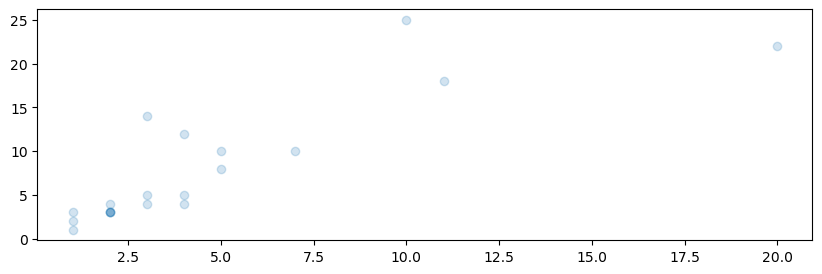

In [7]:
plt.figure(figsize=(10,3))
plt.scatter(cs1['구매일수'], cs1['구매서적수'], alpha=0.2)
plt.show()

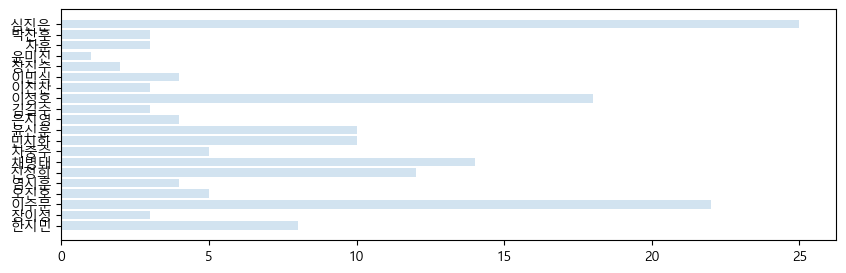

In [11]:
plt.figure(figsize=(10,3))
plt.barh(cs1['고객명'], cs1['구매서적수'], alpha=0.2)
plt.show()

In [15]:
cs1[['지역', '구매서적수']].groupby('지역').sum().reset_index()

# sales[sales.gender=='F'][['age', 'users']].groupby('age').sum().reset_index()

,지역,구매서적수
0,경기,12
1,광주,13
2,대구,5
3,대전,18
4,부산,8
5,서울,72
6,인천,6
7,제주,25


In [18]:
cs1_area = cs1[['지역']].drop_duplicates()
cs1_area['area_seq'] = [1,0,3,4,5,6,7,2] # 기존 순서(알파벳 또는 무작위)를 대신할
cs1_area.sort_values('area_seq')


,지역,area_seq
1,서울,0
0,부산,1
19,제주,2
3,인천,3
7,대구,4
9,광주,5
10,경기,6
12,대전,7


In [23]:
np.array(cs1.columns)

array(['고객명', '성별', '연령', '지역', '구매일수', '최종구매후기간', '구매서적수', '서적구매액',
       '기타상품구매액', '총구매액', '관심쟝르', '구매쟝르수', '가입기간', 'SMS수신여부'],
      dtype=object)

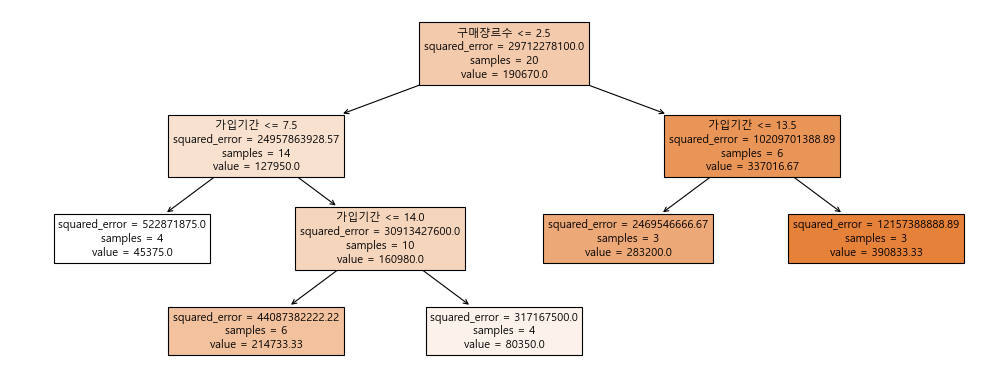

In [33]:
# 천단위 구분 콤마 제거 후 숫자로 데이터 타입 변경
cs1['서적구매액'] = cs1['총구매액'].str.replace(',','').astype(float)
cs1

from sklearn.tree import DecisionTreeRegressor  # 의사결정나무 모듈 불러오기
from sklearn import tree # 의사결정나무 시각화 모듈 불러오기

# 모형의 옵션 지정
dt = DecisionTreeRegressor(max_depth=3, 
                           min_samples_leaf=3)

# X 변수 지정 (saleMon 은 사용 불가 -- object 문자형 변수이며 중복이므로)
dtfeatures = ['구매쟝르수', '가입기간']

# 모형에 데이터를 대입해 모형 완성
dt.fit(cs1[dtfeatures], cs1['서적구매액'])


# 생성된 트리 모형의 시각화
plt.figure(figsize=(16,6), dpi=80)
tree.plot_tree(dt, 
               feature_names=dtfeatures, 
               filled=True, 
               fontsize=10, 
               precision=2)
plt.show()

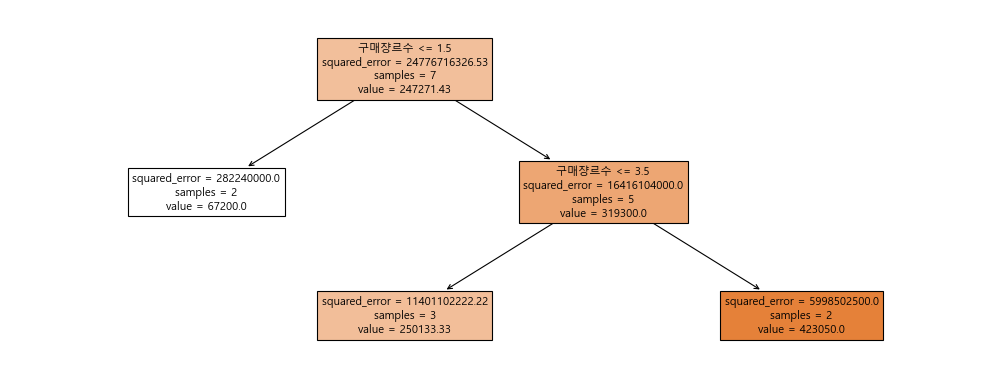

In [35]:
# 천단위 구분 콤마 제거 후 숫자로 데이터 타입 변경
cs1['서적구매액'] = cs1['총구매액'].str.replace(',','').astype(float)
cs1

from sklearn.tree import DecisionTreeRegressor  # 의사결정나무 모듈 불러오기
from sklearn import tree # 의사결정나무 시각화 모듈 불러오기

# 모형의 옵션 지정
dt = DecisionTreeRegressor(max_depth=3, 
                           min_samples_leaf=2)

# X 변수 지정 (saleMon 은 사용 불가 -- object 문자형 변수이며 중복이므로)
dtfeatures = ['구매쟝르수', '가입기간']

# 모형에 데이터를 대입해 모형 완성
dt.fit(cs1.head(7)[dtfeatures], cs1.head(7)['서적구매액'])


# 생성된 트리 모형의 시각화
plt.figure(figsize=(16,6), dpi=80)
tree.plot_tree(dt, 
               feature_names=dtfeatures, 
               filled=True, 
               fontsize=10, 
               precision=2)
plt.show()

In [32]:
cs1[['구매쟝르수', '가입기간','서적구매액']].head(3)

,구매쟝르수,가입기간,서적구매액
0,2,12,134400.0
1,1,24,50400.0
2,4,15,500500.0


In [37]:
a[일평균마진_천원] = a[일평균마진]/1000

판매가별마진 = pd.DataFrame([무슨무슨 컬럼])
a = pd.DataFrame([무슨무슨 컬럼])
a['일평균마진_천원'] = a['일평균마진']/1000

SyntaxError: invalid syntax. Perhaps you forgot a comma? (391138537.py, line 3)

In [22]:
# np.append([...11], [])

a = list(np.arange(12))
a = a + a + a
np.array(a)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11])

In [38]:
import random

teams = ["Style Makers", "Trend Fires", "Fashion Explorers", "Design Elites", "Creative Collectors"]

random.shuffle(teams)

print("발표 순서:")
for idx, team in enumerate(teams, start=1):
    print(f"{idx}. {team}")

발표 순서:
1. Style Makers
2. Trend Fires
3. Creative Collectors
4. Fashion Explorers
5. Design Elites
